
**Step 1 : Reading and Understanding the Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# setting file path
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df.head() # gives only the first 5 rows

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# rows, column
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Step 2: Cleaning the Data

In [ ]:
# dropping the car_ID as it is not affecting the car price

df.drop('car_ID',axis=1,inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Checking if the dataframe has any missing values

print(df.isnull().values.any())

False


In [ ]:
# to see the data type of each column
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

(205, 25)

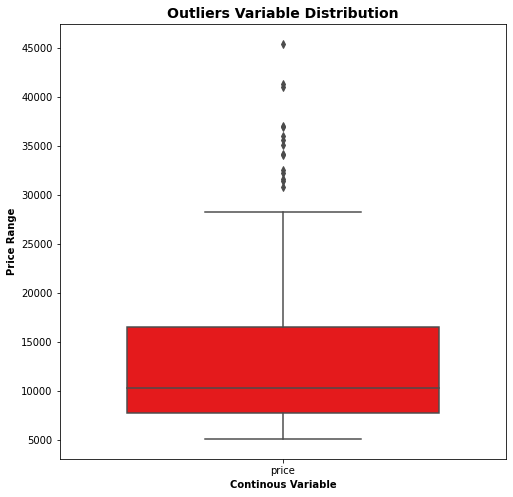

In [ ]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1",whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continous Variable", fontweight = 'bold')
df.shape

### Insights:
### There are some price ranges above 36000 which can be termed as outliers but lets not remove it rather we will use standarization scaling.

In [ ]:
# putting all subcategories into a single category
# Using only the car company names

df['CarName']=df['CarName'].str.split(' ',expand=True)
df['CarName'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

In [ ]:
# checking the unique car companies

df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# renaming the typos in car company names
#replace(wrong:correct)

df['CarName']=df['CarName'].replace({'maxda':'mazda',
                                     'nissan':'Nissan', 
                                     'toyouta':"toyota",
                                     'porcshce':'porsche',
                                     'vokswagen':'volkswagen',
                                     'vw':'volkswagen'
                                    })

In [ ]:
# changing the datatype of 'symboling' from int64 to string as it is a categorical variable as per dictionary file.
# check the result of 'df.dtypes' above.

df['symboling']=df['symboling'].astype(str)
df['symboling'].head()

0    3
1    3
2    1
3    2
4    2
Name: symboling, dtype: object

In [ ]:
# checking for duplicate values

df.loc[df.duplicated()]

# when no rows are printed, means no duplicate values

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [ ]:
# Segregation of columns into numerical and categorical variables
# df.select_dtypes?

cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(exclude='object').columns
df_cat = df[cat_col]
df_num = df[num_col]

In [ ]:

df_cat.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


In [ ]:
df_num.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


# Step 3: Visualizing the Data

In [ ]:
df['CarName'].value_counts()

toyota         32
Nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: CarName, dtype: int64

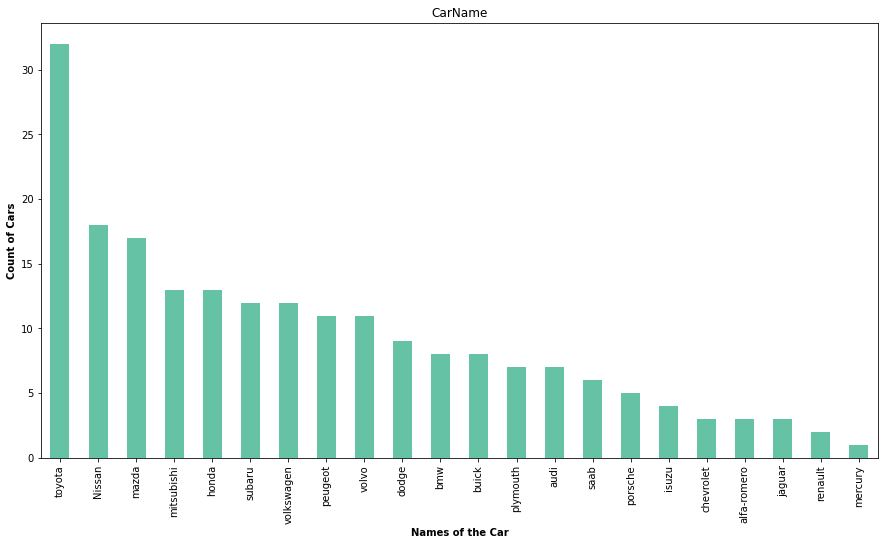

In [ ]:
# Visualizing the different car names available

plt.figure(figsize=(15,8))
ax=df['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set2')
plt.title(label = 'CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')
plt.show()

Insights:

* Toyota seems to be the most favoured cars.

* Mercury seems to be the least favoured cars.

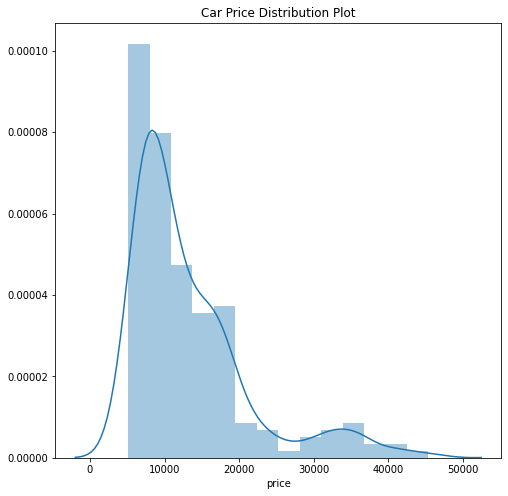

In [ ]:
# Visualizing the distribution of car prices

plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.distplot(df['price']) #The distplot shows the distribution of a univariate set of observations.

The plots seems to be right skewed, the prices of almost all cars looks like less than 18000.


**Visualising Numeric Variables -**

Pairplot of all the numeric variables.

* The pairplot builds on two basic figures, the histogram and the scatter plot. The **histogram** on the diagonal allows us to see the distribution of a single variable while the **scatter plots** on the upper and lower triangles show the relationship (or lack thereof) between two variables(**bivariate relationships**).

* Correlation - Relationship between two variables.




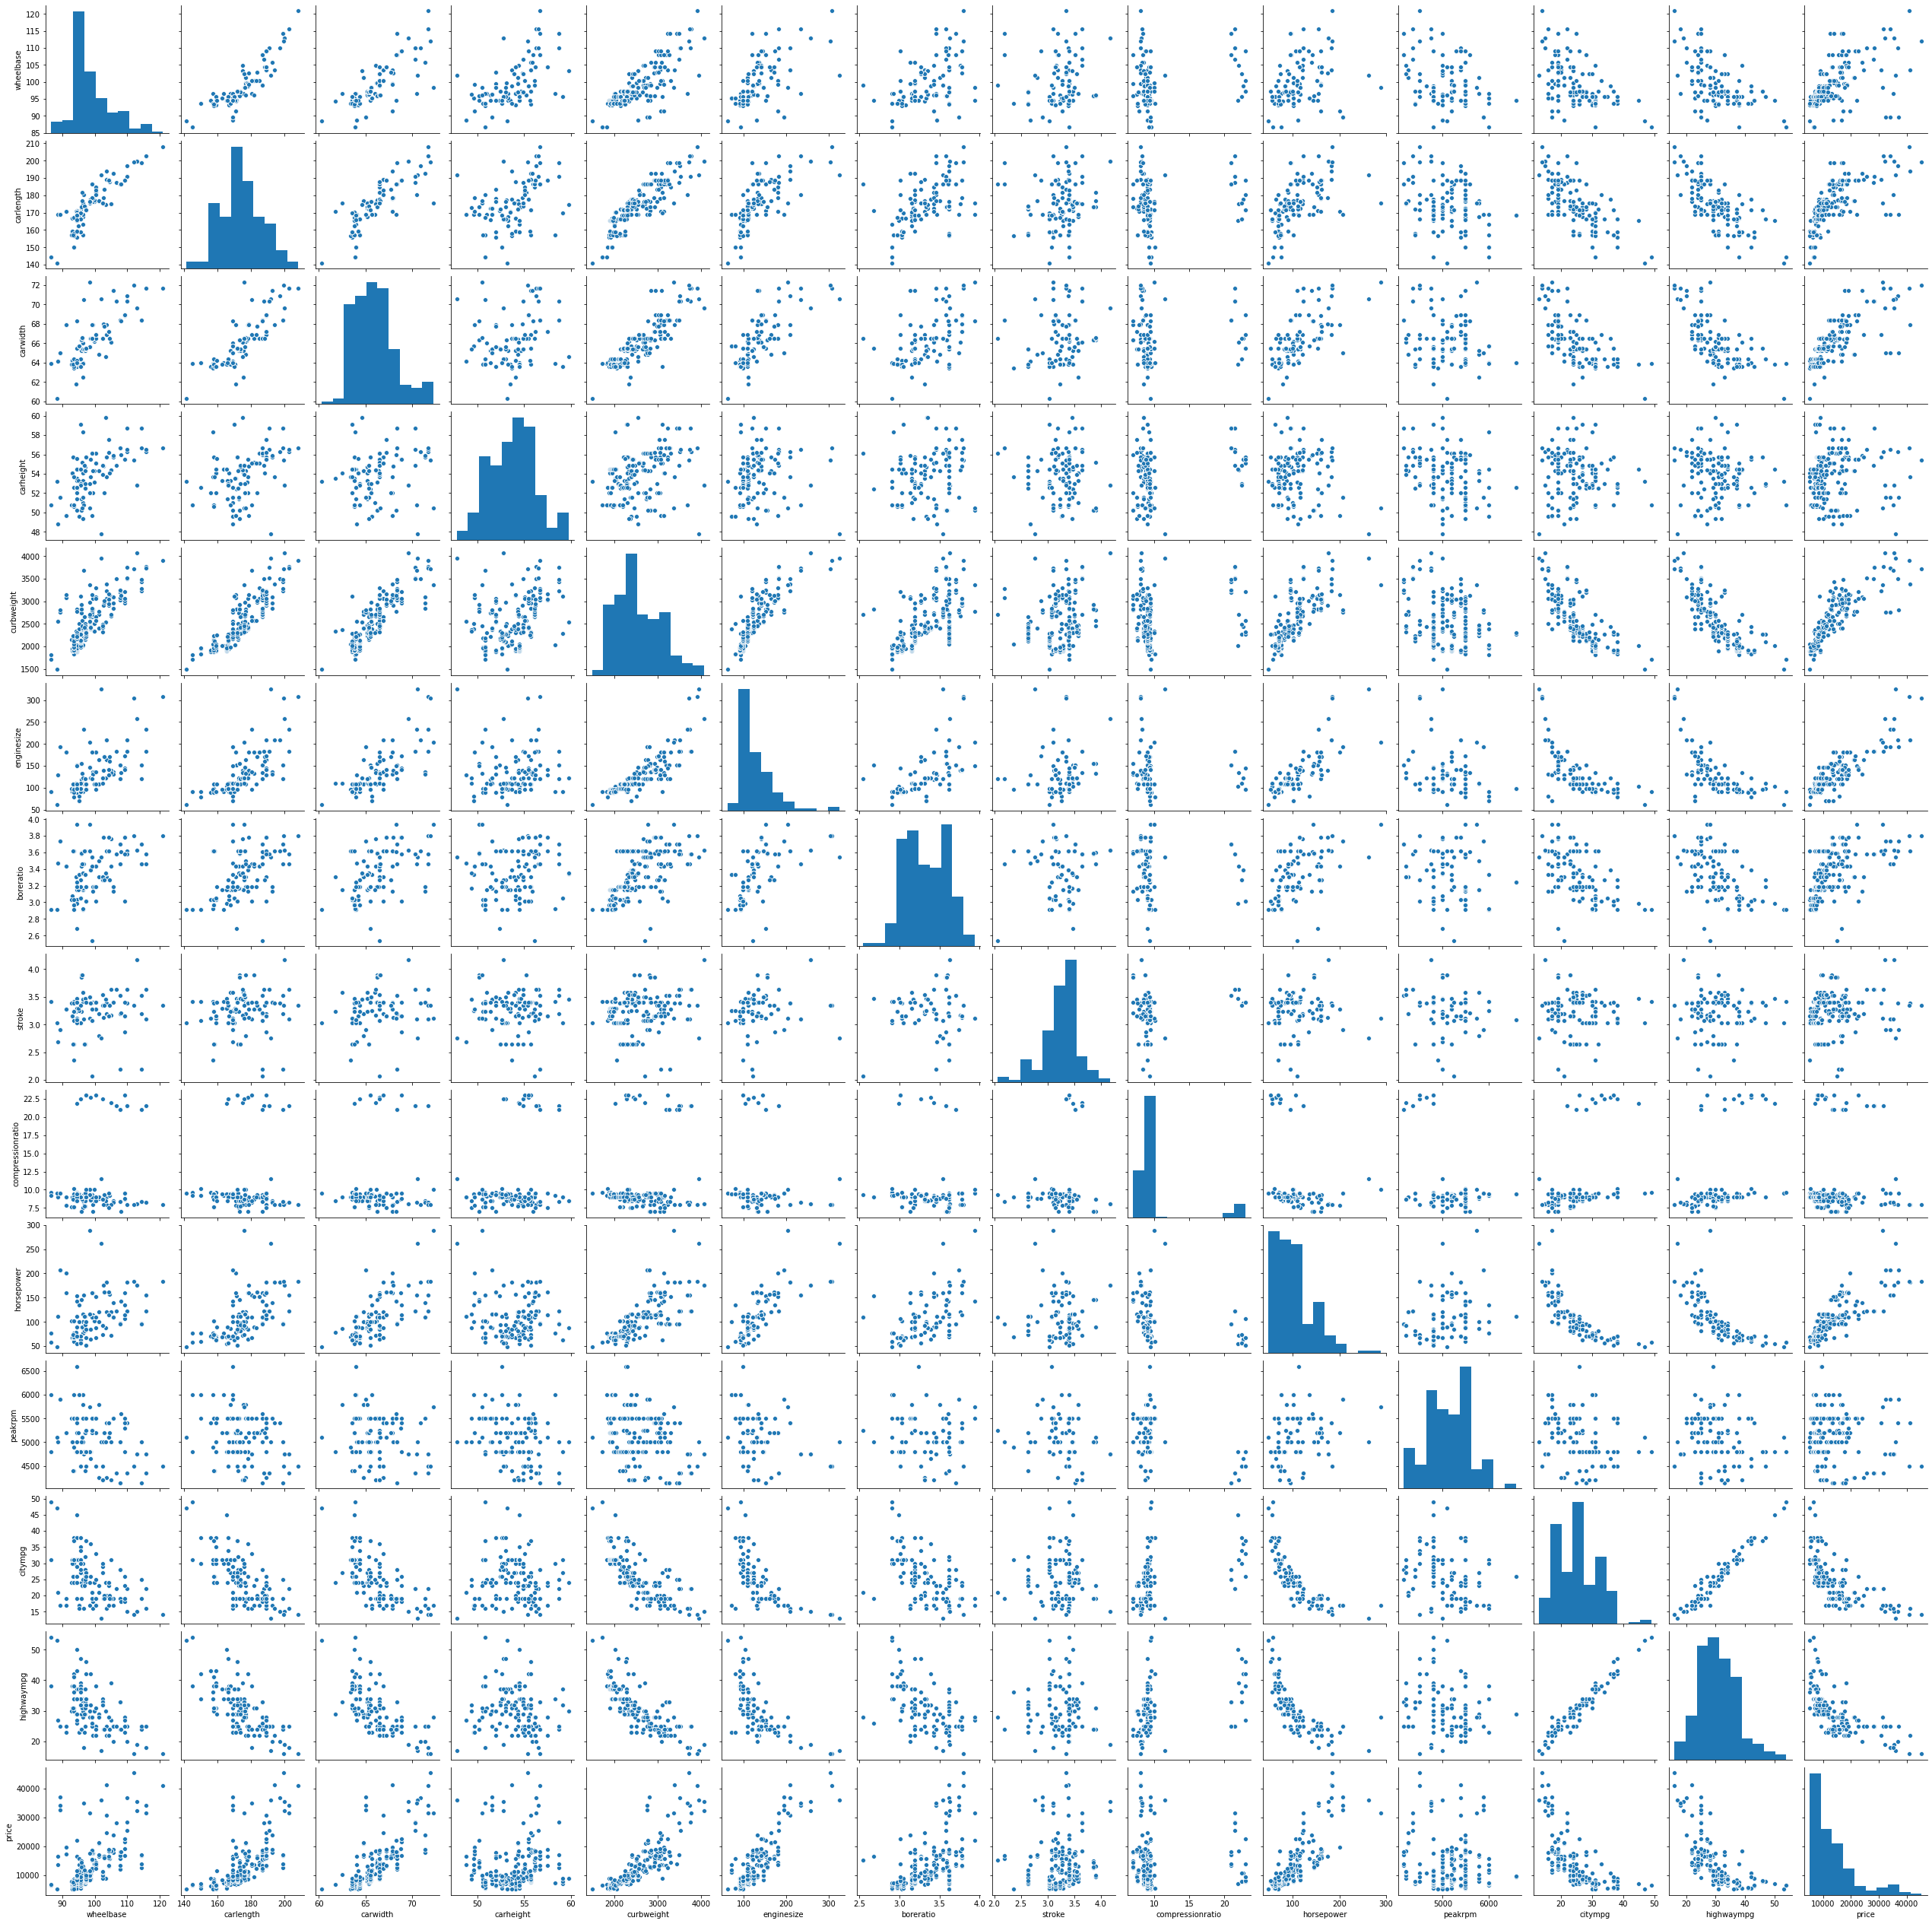

In [ ]:
ax = sns.pairplot(df[num_col])

**Insights:**

* carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a **positive** correlation with price.

* carheight doesn't show any significant trend with price.

* citympg , highwaympg - seem to have a significant **negative** correlation with price.

**Visualising few more Categorical Variables**

**Boxplot** of all the categorical variables.

* It makes comparing characteristics of data between categories very easy.

* We can tell if our data is pulled in one direction.

* An easy way to identify outliers.

**Subplots -**  
syntax - subplot(rows,cols,index)

It provides a way to plot multiple plots on a single figure.

Eg - here we have printed a 3x3 matrix of boxplots.

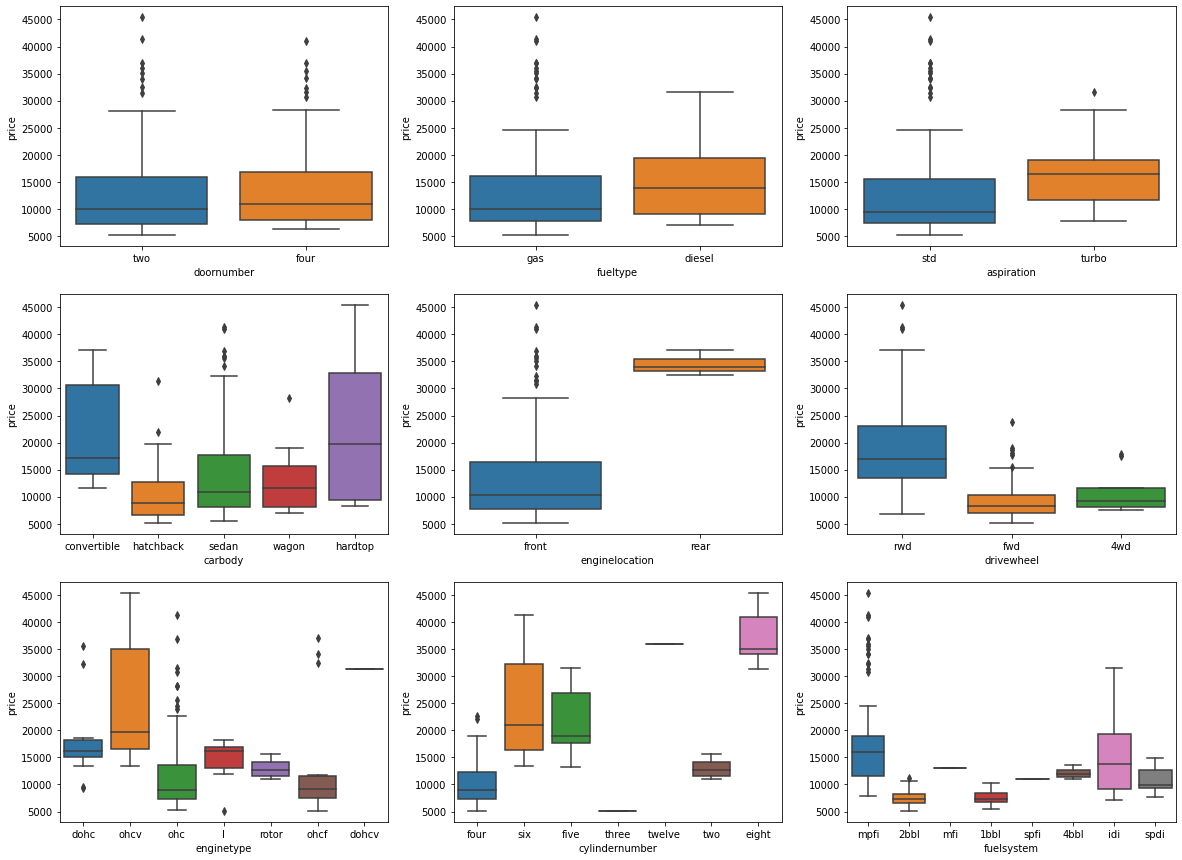

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

**Insights**

* The cars with **fueltype** as diesel are comparatively expensive than the cars with fueltype as gas.

* All the types of carbody is relatively cheaper as compared to **convertible** carbody.

* The cars with rear **enginelocation** are way expensive than cars with front enginelocation.

* The price of car is directly proportional to **no. of cylinders** in most cases.

* **Enginetype** ohcv comes into higher price range cars.

* **DoorNumber** isn't affecting the price much.

* HigerEnd cars seems to have rwd **drivewheel**

[Text(0, 0.5, 'Frequency of Car Body'), Text(0.5, 0, 'Car Body')]

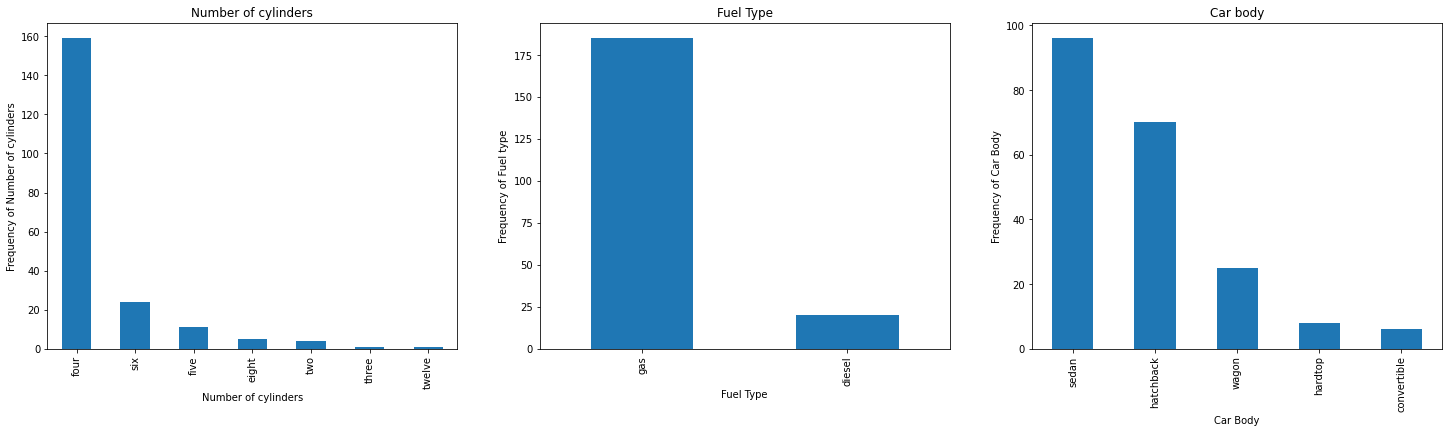

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['cylindernumber'].value_counts().plot(kind = 'bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = df['fueltype'].value_counts().plot(kind = 'bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df['carbody'].value_counts().plot(kind = 'bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

**Insights:**
* The number of cylinders used in most cars is four.
* Number of Gas fueled cars are way more than diesel fueled cars.
* Sedan is the most prefered car type.

Relationship between **fuelsystem** vs **price** with hue **fueltype**

**hue** - showing the data in different colours, segregated on the basis on 'fueltype'.

hue means colour.

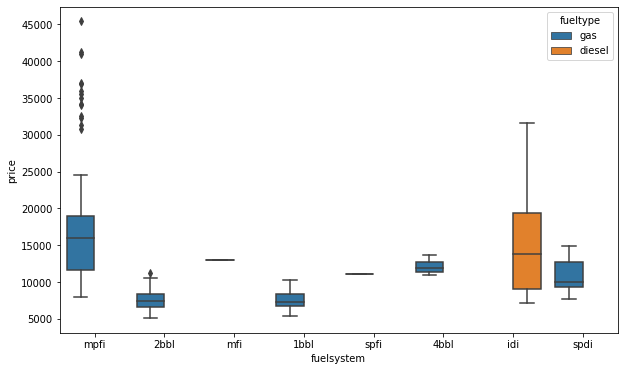

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)
plt.show()

Relationship between **carbody** vs **price** with hue **enginelocation**.

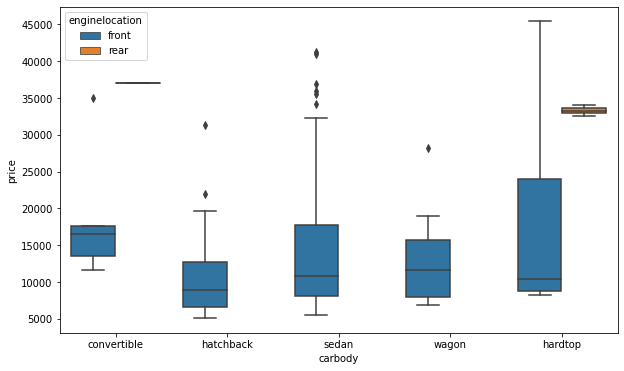

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df)
plt.show()

Relationship between **cylindernumber** vs **price** with hue **fueltype**.

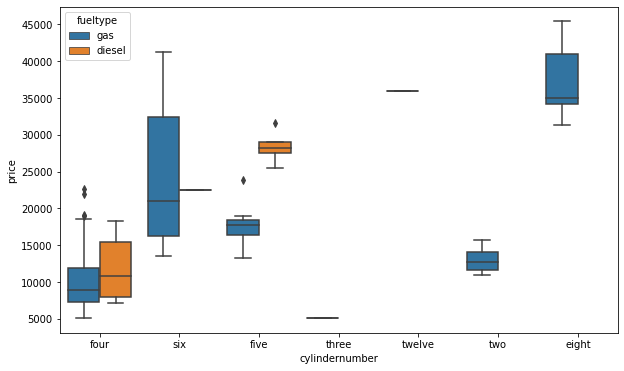

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df)
plt.show()

**Derived Metrices**

carName grouped with respect to their average prices


<Figure size 1440x432 with 0 Axes>

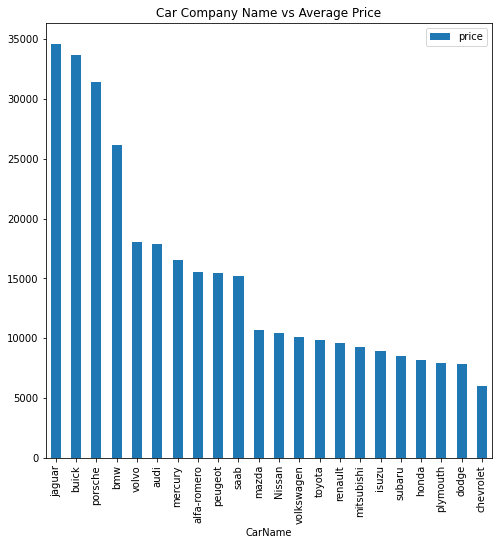

In [ ]:
plt.figure(figsize=(20, 6))

dfx = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
dfx.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

Insights:
* Jaguar,Buick and porsche seems to have the highest average price.

**car body** grouped with respect to their average prices

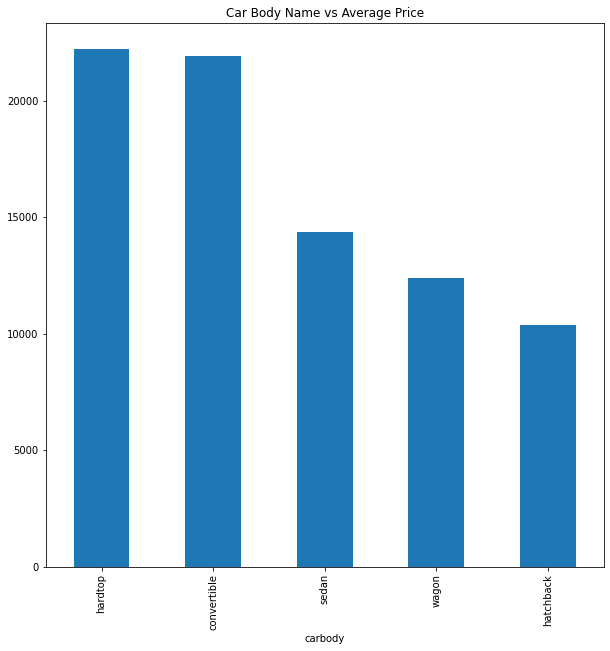

In [ ]:
plt.figure(figsize=(10, 10))

dfx=df.groupby(['carbody'])['price'].mean().sort_values(ascending=False)
dfx.plot.bar()
plt.title('Car Body Name vs Average Price')
plt.show()

**Insights**:

* hardtop and convertible seems to have the highest average price.

In [ ]:
# doubt
# Binning the Car Companies based on avg prices of each car Company.
# Binning - putting into buckets

df['price'] = df['price'].astype('int')
dfx = df.copy()
grouped = dfx.groupby(['CarName'])['price'].mean()
print(grouped)

dfx = dfx.merge(grouped.reset_index(), how='left', on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(dfx['price_y'], bins, right=False, labels=label)
df.head()

CarName
Nissan         10415.666667
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range


**As per the Problem Statement of the question-** 

**Significant variables after Visualization-**

* Cars_Category , Engine Type, engine location, Fuel Type
* Car Body , Aspiration , Cylinder Number
* Drivewheel , Curbweight , Car Length
* Car Length , Car width , Engine Size
* Boreratio , Horse Power , Wheel base
* citympg , highwaympg , price

**Unused variables-**
* Symboling
* car_ID
* CarName
* doornumber - didn't affect price much
* carheight - didn't show any significant trend with price
* fuelsystem
* stroke
* compression ratio
* peakrpm


In [ ]:
# List of significant columns
sig_col = ['Cars_Category','fueltype', 'aspiration','carbody','drivewheel','enginelocation', 'wheelbase', 'carlength', 'carwidth', 
           'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']
len(sig_col)

18

In [ ]:
# Keeping only the significant columns in the data frame

df = df[sig_col]

**Step 4: Data Preprocessing**

**Dummy Variables**

The variable **carbody** has five levels. (convertible, hatchback, sedan, wagon, hardtop)

We change **categorical variables** into integers.

 For this process we use **dummy variables**.

In [ ]:
# Categorical variables found previously
cat_col

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [ ]:
# List of significant categorical variables
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber']

In [ ]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummy1'

dummy1 = pd.get_dummies(df[sig_cat_col])
print(dummy1.shape)
dummy1

(205, 31)


,Cars_Category_Budget_Friendly,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
201,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
202,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
203,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


avoiding dummy trap - 

In [ ]:
# It is a good practice to always drop the first dummy after performing One Hot encoding
# Because the dropped dummy can be explained as the linear combination of the others.
# Therefore, drop_first = True

dummy1 = pd.get_dummies(df[sig_cat_col],drop_first=True)
print(dummy1.shape)
dummy1

(205, 23)


,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
201,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
202,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
203,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
# concatenating the dataframe with the dummy variables
df = pd.concat([df,dummy1], axis = 1)

In [ ]:
# dropping the significant categorial columns as we have already made and added the dummy variables for the same in the dataframe
df.drop(sig_cat_col, axis = 1, inplace = True)
df.shape

(205, 33)

**Step 5: Splitting the Data into Training and Testing Sets**

As we know, the first basic step for regression is performing a train-test split.

In [ ]:
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,23,28,16845,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
201,109.1,188.8,68.8,3049,141,3.78,160,19,25,19045,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
202,109.1,188.8,68.9,3012,173,3.58,134,18,23,21485,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
203,109.1,188.8,68.9,3217,145,3.01,106,26,27,22470,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio

np.random.seed(0)

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,93.7,167.3,63.8,2191,98,2.97,68,31,38,7609,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
125,94.5,168.9,68.3,2778,151,3.94,143,19,27,22018,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
166,94.5,168.7,64.0,2300,98,3.24,112,26,29,9538,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
199,104.3,188.8,67.2,3157,130,3.62,162,17,22,18950,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,96.3,172.4,65.4,2403,110,3.17,116,23,30,9279,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
103,100.4,184.6,66.5,3060,181,3.43,152,19,25,13499,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
67,110.0,190.9,70.3,3515,183,3.58,123,22,25,25552,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
24,93.7,157.3,63.8,1967,90,2.97,68,31,38,6229,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
df_test

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
160,95.7,166.3,64.4,2094,98,3.19,70,38,47,7738,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
186,97.3,171.7,65.5,2275,109,3.19,85,27,34,8495,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
59,98.8,177.8,66.5,2385,122,3.39,84,26,32,8845,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
165,94.5,168.7,64.0,2265,98,3.24,112,26,29,9298,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
140,93.3,157.3,63.8,2240,108,3.62,73,26,31,7603,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,103.3,174.6,64.6,2535,122,3.34,88,24,30,8921,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
29,95.9,173.2,66.3,2811,156,3.60,145,19,24,12964,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
182,97.3,171.7,65.5,2261,97,3.01,52,37,46,7775,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
40,96.5,175.4,62.5,2372,110,3.15,86,27,33,10295,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


* **Feature Scaling**

Here we are rescaling the data using **Standardisation Scaling**.

Scaling needs to be done on the significant num columns.

 The significant **categorical columns** have already been converted into **dummies**.

In [ ]:
# Numerical variables found previously
num_col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
# List of significant numerical variables
sig_num_col = ['wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower','citympg', 'highwaympg', 'price']

In [ ]:
# We apply feature scaling only on the numerical variables
# since categorical variables are already converted to 0 and 1 using dummies.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [ ]:
df_train.head() 

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,-0.811836,-0.487238,-0.924500,-0.642128,-0.660242,-1.297329,-0.872898,0.839773,1.025419,-0.700200,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
125,-0.677177,-0.359789,1.114978,0.439415,0.637806,2.432256,1.021826,-0.957048,-0.557490,1.151931,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
166,-0.677177,-0.375720,-0.833856,-0.441296,-0.660242,-0.259197,0.238673,0.091098,-0.269688,-0.452246,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-1.670284,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.657578,-0.557490,0.442648,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
199,0.972390,1.225364,0.616439,1.137720,0.123485,1.201877,1.501822,-1.256518,-1.276993,0.757571,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


**Checking the correlation coefficients to see which variables are highly correlated.**

A **heatmap** is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. 

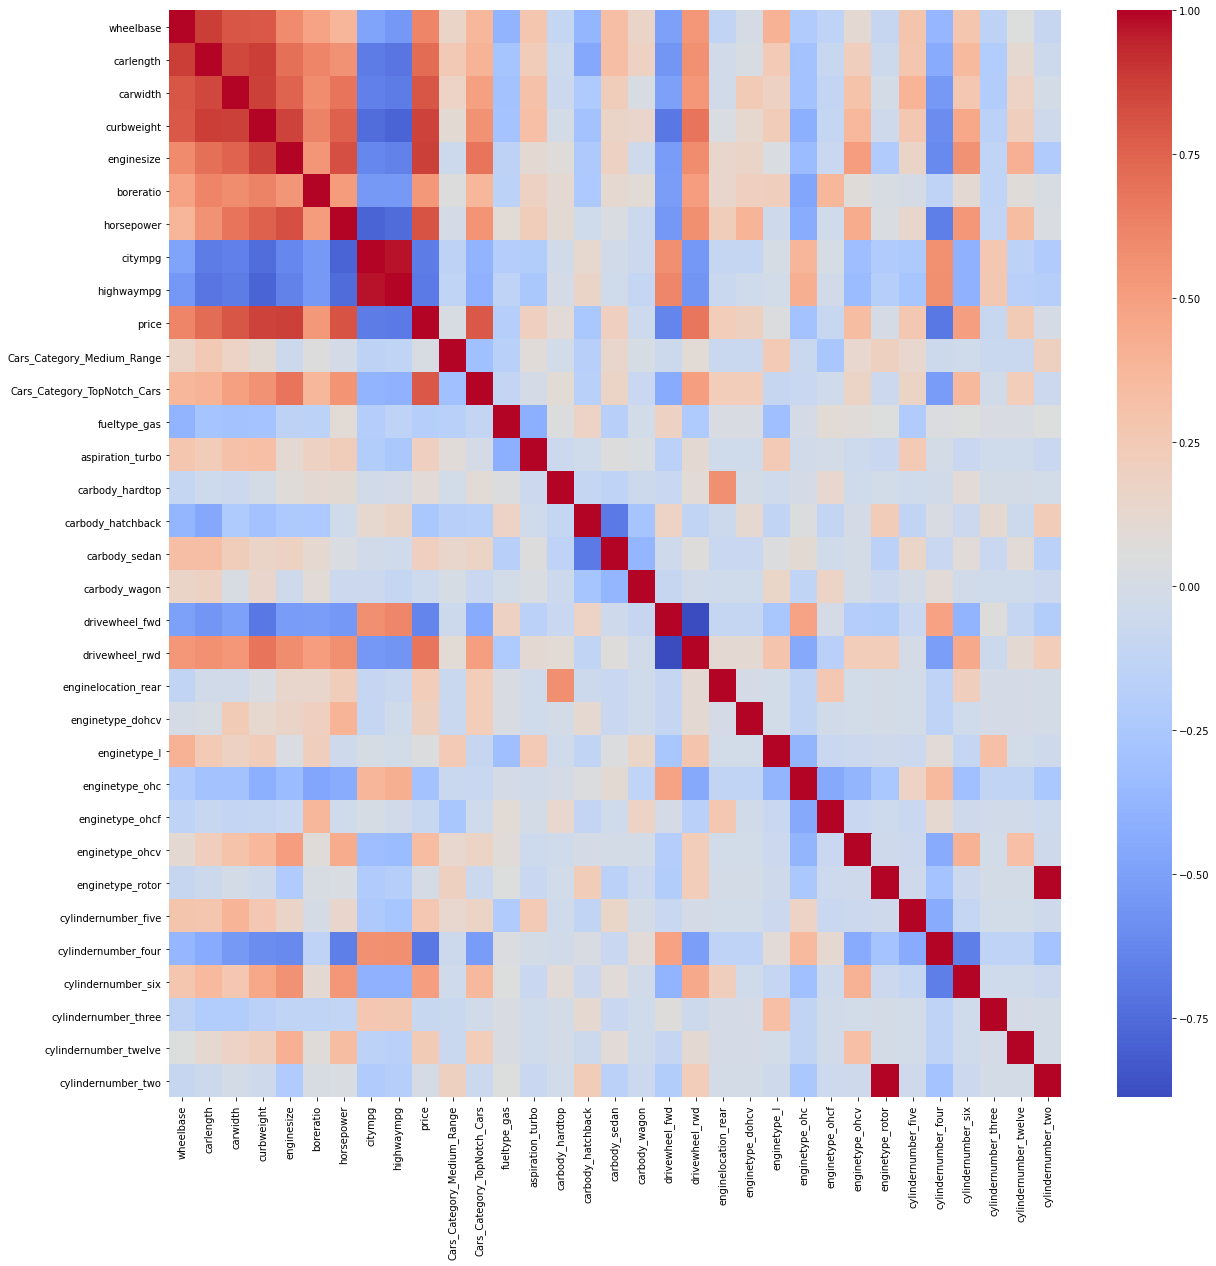

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), cmap= 'coolwarm')
plt.show()

**Insights**

* Here The legend on the right covers the correlation coefficient with blue identifying the low and red identifying high correlation coefficient of variables.

Let's see scatterplot for few correlated variables vs price.

In [ ]:
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']

"\nfig,axes = plt.subplots(2,3,figsize=(18,15))\nfor seg,colm in enumerate(col):\n    x,y = seg//3,seg%3\n    an=sns.scatterplot(x=colm, y='price' ,data=df, ax=axes[x,y])\n    plt.setp(an.get_xticklabels(), rotation=45)\n   \nplt.subplots_adjust(hspace=0.5)\n"

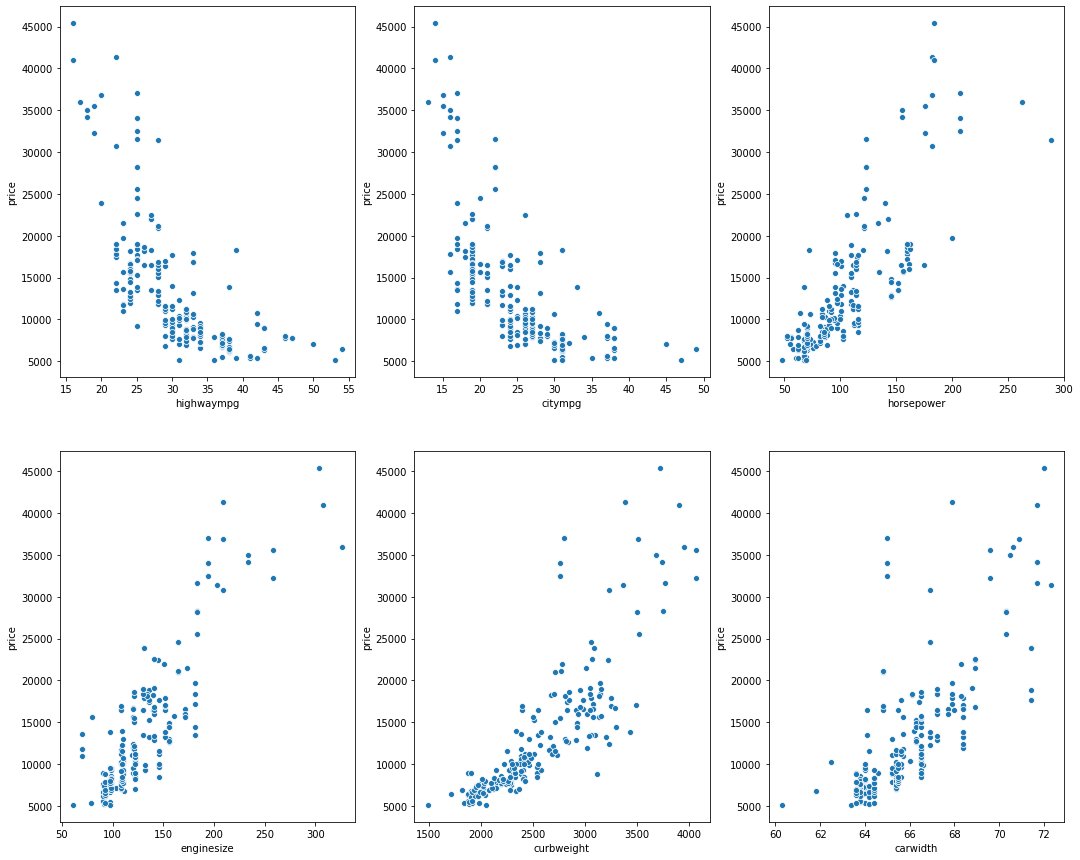

In [ ]:
# Scatter Plot of independent variables vs dependent variables

plt.figure(figsize=(18,15))

plt.subplot(2,3,1)
sns.scatterplot(x=col[0],y='price',data =df)

plt.subplot(2,3,2)
sns.scatterplot(x=col[1],y='price',data =df)

plt.subplot(2,3,3)
sns.scatterplot(x=col[2],y='price',data =df)

plt.subplot(2,3,4)
sns.scatterplot(x=col[3],y='price',data =df)

plt.subplot(2,3,5)
sns.scatterplot(x=col[4],y='price',data =df)

plt.subplot(2,3,6)
sns.scatterplot(x=col[5],y='price',data =df)

'''
fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,colm in enumerate(col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=colm, y='price' ,data=df, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)
'''

* We can see there is a line we can fit in above plots

Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('price') # dependent variable
x_train = df_train # Taking all the independent variables into x_train

In [ ]:
y_train

122   -0.700200
125    1.151931
166   -0.452246
1      0.442648
199    0.757571
         ...   
87    -0.485538
103    0.056900
67     1.606191
24    -0.877585
8      1.390630
Name: price, Length: 143, dtype: float64

In [ ]:
x_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,-0.811836,-0.487238,-0.924500,-0.642128,-0.660242,-1.297329,-0.872898,0.839773,1.025419,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
125,-0.677177,-0.359789,1.114978,0.439415,0.637806,2.432256,1.021826,-0.957048,-0.557490,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
166,-0.677177,-0.375720,-0.833856,-0.441296,-0.660242,-0.259197,0.238673,0.091098,-0.269688,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-1.670284,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.657578,-0.557490,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
199,0.972390,1.225364,0.616439,1.137720,0.123485,1.201877,1.501822,-1.256518,-1.276993,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.374195,-0.080993,-0.199352,-0.251520,-0.366345,-0.528342,0.339725,-0.358108,-0.125787,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
103,0.315930,0.890809,0.299187,0.958998,1.372551,0.471340,1.249192,-0.957048,-0.845291,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
67,1.931832,1.392642,2.021412,1.797333,1.421534,1.048080,0.516566,-0.507843,-0.845291,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
24,-0.811836,-1.283797,-0.924500,-1.054847,-0.856174,-1.297329,-0.872898,0.839773,1.025419,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


**Step 6: Building a Linear Model**

In [ ]:
import statsmodels.api as sm

x_train_copy = x_train

In [ ]:
# Add a constant
x_train_copy1 = sm.add_constant(x_train_copy['horsepower'])

# Create a first fitted model
#1st model
lr1=sm.OLS(y_train,x_train_copy1).fit()

In [ ]:
lr1.params

const         7.112366e-17
horsepower    8.061819e-01
dtype: float64

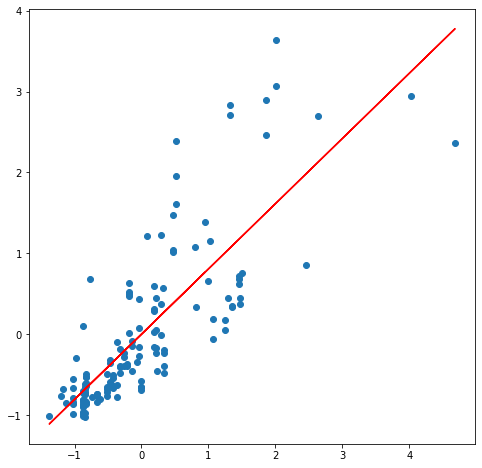

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(x_train_copy1.iloc[:, 1], y_train)
plt.plot(x_train_copy1.iloc[:, 1], 0.8062*x_train_copy1.iloc[:, 1], 'r')
plt.show()

In [ ]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           6.05e-34
Time:                        17:50:31   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.112e-17      0.050   1.43e-15      1.0

**Adding another variable**

The **R-squared** value obtained is **0.65**. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. **curbweight**.

In [ ]:
# Add a constant
x_train_2copy = sm.add_constant(x_train[['horsepower','curbweight']])

# Create a 2nd fitted model
lr2 = sm.OLS(y_train, x_train_2copy).fit()

In [ ]:
lr2.params

const         7.112366e-17
horsepower    3.580598e-01
curbweight    5.898214e-01
dtype: float64

In [ ]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           3.34e-49
Time:                        17:50:31   Log-Likelihood:                -88.896
No. Observations:                 143   AIC:                             183.8
Df Residuals:                     140   BIC:                             192.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.112e-17      0.038   1.87e-15      1.0

* The R-squared increased from 0.650 to 0.797.

**Adding another variable**

The R-squared value obtained is **0.797**. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. **enginesize**.

In [ ]:
# Add a constant
x_train_3copy = sm.add_constant(x_train[['horsepower','curbweight', 'enginesize']])

# Create a 2nd fitted model
lr3 = sm.OLS(y_train, x_train_3copy).fit()

In [ ]:
lr3.params

const         5.204170e-17
horsepower    2.288470e-01
curbweight    3.938203e-01
enginesize    3.400426e-01
dtype: float64

In [ ]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           2.16e-51
Time:                        17:50:31   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.204e-17      0.036   1.44e-15      1.0

We have achieved a **R-squared** of **0.819** by manually picking the highly correlated variables. Now lets use **RFE** to select the independent variables which accurately predicts the dependent variable price.

**Recursive Feature Elimination (RFE)**

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

We use this as there are too many independent variables.


In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Running RFE with the output number of the variable equal to 15
from sklearn.feature_selection import RFE

rfe=RFE(lm,15)
rfe=rfe.fit(x_train,y_train)

checking which variables support RFE

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 8),
 ('carlength', False, 10),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 14),
 ('boreratio', False, 12),
 ('horsepower', False, 2),
 ('citympg', False, 18),
 ('highwaympg', False, 7),
 ('Cars_Category_Medium_Range', False, 5),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 17),
 ('aspiration_turbo', False, 15),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 6),
 ('drivewheel_rwd', False, 13),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 9),
 ('enginetype_ohc', False, 3),
 ('enginetype_ohcf', False, 4),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 16),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 11),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', T

In [ ]:
# List of Columns which supports the RFE
# Selecting the variables which are in support

col_sup = x_train.columns[rfe.support_]
col_sup

Index(['carwidth', 'curbweight', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [ ]:
# Creating X_train dataframe with RFE selected variables

x_train_rfe = x_train[col_sup]
x_train_rfe

,carwidth,curbweight,Cars_Category_TopNotch_Cars,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,enginetype_dohcv,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two
122,-0.924500,-0.642128,0,0,0,1,0,0,0,0,0,1,0,0,0
125,1.114978,0.439415,1,0,1,0,0,0,0,0,0,1,0,0,0
166,-0.833856,-0.441296,0,0,1,0,0,0,0,0,0,1,0,0,0
1,-0.788535,0.015642,0,0,0,0,0,0,0,0,0,1,0,0,0
199,0.616439,1.137720,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.199352,-0.251520,0,0,0,1,0,0,0,0,0,1,0,0,0
103,0.299187,0.958998,0,0,0,1,0,0,0,1,0,0,1,0,0
67,2.021412,1.797333,1,0,0,1,0,0,0,0,1,0,0,0,0
24,-0.924500,-1.054847,0,0,1,0,0,0,0,0,0,1,0,0,0


**(Theory)**

**VIF - Variance Inflation Factor**

Checking VIF -

VIF gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 

Vif Values of variables should be less than 5 to be accepted.

The **formula** for calculating VIF is:

**VIFi=1/(1−Ri^2)** ->[i is a subscript]

**(Step)**

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value. Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.

We want **p-value** less than **0.05**

**Drop the variable if**
* High p-value, High VIF

**Drop the variable with high p-value first if**
* High p-value, Low VIF or Low p-value, High VIF 

**Accept the variable if**
* Low p-value Low VIF 

In [ ]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
x_train_rfec = sm.add_constant(x_train_rfe)
lm_rfe = sm.OLS(y_train,x_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     115.5
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           2.53e-66
Time:                        17:50:31   Log-Likelihood:                -11.032
No. Observations:                 143   AIC:                             54.06
Df Residuals:                     127   BIC:                             101.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables)
and we need to drop it.

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cylindernumber_four,23.04
5,carbody_sedan,15.98
4,carbody_hatchback,11.73
1,curbweight,7.27
0,carwidth,6.21
12,cylindernumber_six,5.73
6,carbody_wagon,5.08
10,cylindernumber_five,3.10
3,carbody_hardtop,2.15
2,Cars_Category_TopNotch_Cars,2.05


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

**Dropping the variable and updating the model**

Dropping cylindernumber_twelve beacuse its p-value is 0.355 and we want p-value less than 0.05 and hence rebuilding the model

In [ ]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe1 = x_train_rfe.drop('cylindernumber_twelve', 1)

# Adding a constant variable and Build a second fitted model

x_train_rfe1c = sm.add_constant(x_train_rfe1)
lm_rfe1 = sm.OLS(y_train, x_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     123.8
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           3.41e-67
Time:                        17:50:32   Log-Likelihood:                -11.515
No. Observations:                 143   AIC:                             53.03
Df Residuals:                     128   BIC:                             97.47
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cylindernumber_four,21.11
5,carbody_sedan,14.43
4,carbody_hatchback,10.74
1,curbweight,7.07
0,carwidth,6.13
6,carbody_wagon,4.78
12,cylindernumber_six,4.71
10,cylindernumber_five,2.85
3,carbody_hardtop,2.09
2,Cars_Category_TopNotch_Cars,2.01


Dropping **cylindernumber_six** beacuse its p-value is **0.490** and we want p-value less than 0.05 and hence rebuilding the model

In [ ]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe2 = x_train_rfe1.drop('cylindernumber_six', 1)

# Adding a constant variable and Build a second fitted model

x_train_rfe2c = sm.add_constant(x_train_rfe2)
lm_rfe2 = sm.OLS(y_train, x_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     133.8
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           3.66e-68
Time:                        17:50:32   Log-Likelihood:                -11.782
No. Observations:                 143   AIC:                             51.56
Df Residuals:                     129   BIC:                             93.04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values, i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cylindernumber_four,9.07
1,curbweight,6.42
0,carwidth,5.77
5,carbody_sedan,5.66
4,carbody_hatchback,4.37
6,carbody_wagon,2.66
2,Cars_Category_TopNotch_Cars,2.00
10,cylindernumber_five,1.78
3,carbody_hardtop,1.75
7,enginelocation_rear,1.63


Dropping **carbody_hardtop** beacuse its p-value is **0.05** and we want p-value less than 0.05 and hence rebuilding the model.

In [ ]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe3 = x_train_rfe2.drop('carbody_hardtop', 1)

# Adding a constant variable and Build a second fitted model

x_train_rfe3c = sm.add_constant(x_train_rfe3)
lm_rfe3 = sm.OLS(y_train, x_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     141.5
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           2.04e-68
Time:                        17:50:32   Log-Likelihood:                -13.917
No. Observations:                 143   AIC:                             53.83
Df Residuals:                     130   BIC:                             92.35
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe3.values, i) for i in range(x_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,cylindernumber_four,7.82
1,curbweight,6.35
0,carwidth,5.72
4,carbody_sedan,5.04
3,carbody_hatchback,3.92
5,carbody_wagon,2.44
2,Cars_Category_TopNotch_Cars,1.98
9,cylindernumber_five,1.71
8,enginetype_ohcv,1.48
11,cylindernumber_two,1.33


Dropping **enginetype_ohcv** beacuse its p-value is **0.402** and we want p-value less than 0.05 and hence rebuilding the model.

In [ ]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe4 = x_train_rfe3.drop('enginetype_ohcv', 1)

# Adding a constant variable and Build a second fitted model

x_train_rfe4c = sm.add_constant(x_train_rfe4)
lm_rfe4 = sm.OLS(y_train, x_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     154.6
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           2.27e-69
Time:                        17:50:32   Log-Likelihood:                -14.306
No. Observations:                 143   AIC:                             52.61
Df Residuals:                     131   BIC:                             88.17
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe4.values, i) for i in range(x_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,cylindernumber_four,6.92
1,curbweight,6.28
0,carwidth,5.71
4,carbody_sedan,4.35
3,carbody_hatchback,3.18
5,carbody_wagon,2.25
2,Cars_Category_TopNotch_Cars,1.97
8,cylindernumber_five,1.55
10,cylindernumber_two,1.28
7,enginetype_dohcv,1.24


Dropping **enginetype_dohcv** because its p-value is **0.712** and we want p-value less than 0.05 and hence rebuilding the model.

In [ ]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe5 = x_train_rfe4.drop('enginetype_dohcv', 1)

# Adding a constant variable and Build a second fitted model

x_train_rfe5c = sm.add_constant(x_train_rfe5)
lm_rfe5 = sm.OLS(y_train, x_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     171.2
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           1.81e-70
Time:                        17:50:32   Log-Likelihood:                -14.380
No. Observations:                 143   AIC:                             50.76
Df Residuals:                     132   BIC:                             83.35
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe5.values, i) for i in range(x_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,cylindernumber_four,6.88
1,curbweight,5.85
0,carwidth,5.10
4,carbody_sedan,4.35
3,carbody_hatchback,3.10
5,carbody_wagon,2.23
2,Cars_Category_TopNotch_Cars,1.89
7,cylindernumber_five,1.50
9,cylindernumber_two,1.27
6,enginelocation_rear,1.12


Dropping **cylindernumber_five** because its p-value is **0.051** and we want p-value less than 0.05 and hence rebuilding the model.

In [ ]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe6 = x_train_rfe5.drop('cylindernumber_five', 1)

# Adding a constant variable and Build a second fitted model

x_train_rfe6c = sm.add_constant(x_train_rfe6)
lm_rfe6 = sm.OLS(y_train, x_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     185.8
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           8.58e-71
Time:                        17:50:32   Log-Likelihood:                -16.446
No. Observations:                 143   AIC:                             52.89
Df Residuals:                     133   BIC:                             82.52
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe6.values, i) for i in range(x_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernumber_four,5.99
1,curbweight,5.53
0,carwidth,4.62
4,carbody_sedan,3.61
3,carbody_hatchback,2.75
5,carbody_wagon,1.98
2,Cars_Category_TopNotch_Cars,1.89
8,cylindernumber_two,1.23
6,enginelocation_rear,1.12


Dropping **cylindernumber_two** because its p-value is **0.845** and we want p-value less than 0.05 and hence rebuilding the model.

In [ ]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe7 = x_train_rfe6.drop('cylindernumber_two', 1)

# Adding a constant variable and Build a second fitted model

x_train_rfe7c = sm.add_constant(x_train_rfe7)
lm_rfe7 = sm.OLS(y_train, x_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     210.5
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           5.83e-72
Time:                        17:50:32   Log-Likelihood:                -16.467
No. Observations:                 143   AIC:                             50.93
Df Residuals:                     134   BIC:                             77.60
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe7.values, i) for i in range(x_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,5.50
7,cylindernumber_four,5.31
0,carwidth,4.62
4,carbody_sedan,3.32
3,carbody_hatchback,2.25
5,carbody_wagon,1.88
2,Cars_Category_TopNotch_Cars,1.87
6,enginelocation_rear,1.11


Dropping **curbweight** beacuse its VIF is **5.50** and we want VIF less than 5 and hence rebuilding the model.

In [ ]:
x_train_rfe8 = x_train_rfe7.drop('curbweight', 1,)

# Adding a constant variable and Build a sixth fitted model
x_train_rfe8c = sm.add_constant(x_train_rfe8)
lm_rfe8 = sm.OLS(y_train, x_train_rfe8c).fit()

#Summary of linear model
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     169.5
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           1.22e-63
Time:                        17:50:33   Log-Likelihood:                -39.788
No. Observations:                 143   AIC:                             95.58
Df Residuals:                     135   BIC:                             119.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe8.values, i) for i in range(x_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,cylindernumber_four,5.10
3,carbody_sedan,3.31
2,carbody_hatchback,2.24
1,Cars_Category_TopNotch_Cars,1.72
0,carwidth,1.69
4,carbody_wagon,1.69
5,enginelocation_rear,1.11


Dropping **cylindernumber_four** beacuse its VIF is **5.10** and we want VIF less than 5 and hence rebuilding the model.

In [ ]:
x_train_rfe9 = x_train_rfe8.drop('cylindernumber_four', 1,)

# Adding a constant variable and Build a sixth fitted model
x_train_rfe9c = sm.add_constant(x_train_rfe9)
lm_rfe9 = sm.OLS(y_train, x_train_rfe9c).fit()

#Summary of linear model
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     154.4
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           3.57e-58
Time:                        17:50:33   Log-Likelihood:                -55.916
No. Observations:                 143   AIC:                             125.8
Df Residuals:                     136   BIC:                             146.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe9.values, i) for i in range(x_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Cars_Category_TopNotch_Cars,1.63
0,carwidth,1.40
3,carbody_sedan,1.15
5,enginelocation_rear,1.11
2,carbody_hatchback,1.07
4,carbody_wagon,1.00


Lets drop **carbody_sedan** and see if there is any drastic fall in R squared. If not we can drop carbody sedan. Our aim is to explain the maximum variance with minimum variable.

In [ ]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe10 = x_train_rfe9.drop('carbody_sedan', 1,)

# Adding a constant variable and Build a sixth fitted model
x_train_rfe10c = sm.add_constant(x_train_rfe10)
lm_rfe10 = sm.OLS(y_train, x_train_rfe10c).fit()

#Summary of linear model
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     175.5
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           9.67e-58
Time:                        17:50:33   Log-Likelihood:                -59.752
No. Observations:                 143   AIC:                             131.5
Df Residuals:                     137   BIC:                             149.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The R squared value just dropped by 0.006. Hence we can proceed with dropping carbody_sedan.

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe10.values, i) for i in range(x_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Cars_Category_TopNotch_Cars,1.45
0,carwidth,1.40
4,enginelocation_rear,1.10
2,carbody_hatchback,1.07
3,carbody_wagon,1.00


Dropping **carbody_wagon** beacuse its p-value is **0.327** and we want p-value less than 0.05 and hence rebuilding the model



In [ ]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe11 = x_train_rfe10.drop('carbody_wagon', 1,)

# Adding a constant variable and Build a sixth fitted model
x_train_rfe11c = sm.add_constant(x_train_rfe11)
lm_rfe11 = sm.OLS(y_train, x_train_rfe11c).fit()

#Summary of linear model
print(lm_rfe11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           9.90e-59
Time:                        17:50:33   Log-Likelihood:                -60.255
No. Observations:                 143   AIC:                             130.5
Df Residuals:                     138   BIC:                             145.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe11.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe11.values, i) for i in range(x_train_rfe11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Cars_Category_TopNotch_Cars,1.45
0,carwidth,1.40
3,enginelocation_rear,1.10
2,carbody_hatchback,1.07


Dropping **carbody_hatchback** because its p-value is **0.266** and we want p-value less than 0.05 and hence rebuilding the model

In [ ]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe12 = x_train_rfe11.drop('carbody_hatchback', 1,)

# Adding a constant variable and Build a sixth fitted model
x_train_rfe12c = sm.add_constant(x_train_rfe12)
lm_rfe12 = sm.OLS(y_train, x_train_rfe12c).fit()

#Summary of linear model
print(lm_rfe12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     291.3
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           9.90e-60
Time:                        17:50:33   Log-Likelihood:                -60.899
No. Observations:                 143   AIC:                             129.8
Df Residuals:                     139   BIC:                             141.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe12.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe12.values, i) for i in range(x_train_rfe12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Cars_Category_TopNotch_Cars,1.40
0,carwidth,1.32
2,enginelocation_rear,1.09


Now the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model lm_rfe12 and lm_rfe9.

**Here, we are proposing Business 2 Models which can be used to predict the car prices.**

**MODEL I**

With lm_rfe12 which has basically 3 predictor variables.

**Step 7: Residual Analysis of the train data**

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

An error term appears in a statistical model, like a regression model, to indicate the uncertainty in the model.

In [ ]:
# Predicting the price of training set.
y_train_price = lm_rfe12.predict(x_train_rfe12c)

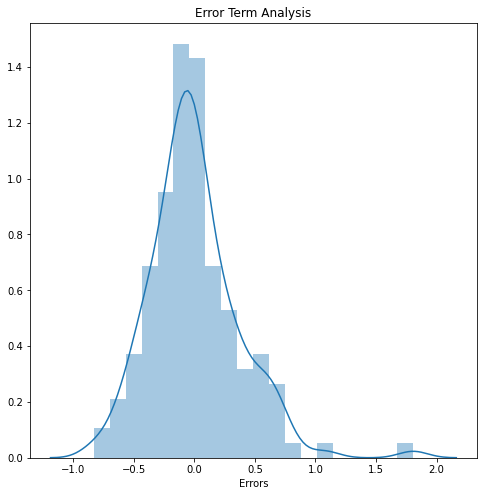

In [ ]:
# Plot the histogram of the error terms
# error between the actual price and the predicted price by our model

sns.distplot((y_train - y_train_price),bins=20)
plt.title('Error Term Analysis')
plt.xlabel('Errors')
plt.show()


Here we can see that the error is nearly 0.0, so the error terms are normally distributed.

**Step 8: Making Predictions Using the Final Model**

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

Applying the scaling on the test sets.

In [ ]:
df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 33)

Dividing test set into x_test and y_test


In [ ]:
y_test = df_test.pop('price')
x_test = df_test

In [ ]:
# Adding Constant
x_test_1 = sm.add_constant(x_test)

x_test_new = x_test_1[x_train_rfe12c.columns]

In [ ]:
# Making predictions using the final model
y_pred = lm_rfe12.predict(x_test_new)

In [ ]:
y_pred

160   -0.556495
186   -0.274891
59    -0.018888
165   -0.658896
140   -0.710097
         ...   
28    -0.505294
29    -0.070088
182   -0.274891
40    -1.042902
128    2.695695
Length: 62, dtype: float64


**Step 9: Model Evaluation**

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

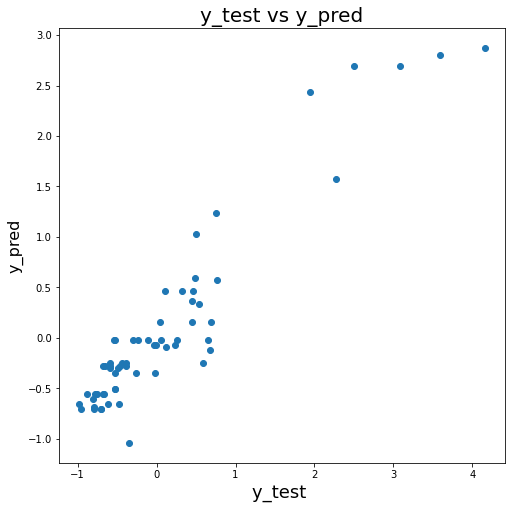

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)  

RMSE Score

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8763081623723828

The **R-squared** score of **Training set** is **0.860** and **Test set** is **0.876** which is quite close. Hence, We can say that our model is good enough to predict the Car prices using below predictor variables.

* Cars_Category_TopNotch_Cars
* carwidth
* enginelocation_rear

**Model I Conclusions:**

* R-squared and Adjusted R-squared - 0.860 and 0.876 - 90% variance explained.
* F-stats and Prob(F-stats) (overall model fit) - 291.3 and 9.90e-60(approx. 0.0) - Model fit is significant and explained 90%.
* variance is just not by chance.
p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the
predictors are statistically significant.

**MODEL II**

With lm_rfe9 which has basically 6 predictor variables.

* Cars_Category_TopNotch_Cars	
* carwidth	
* carbody_sedan	
* enginelocation_rear	
* carbody_hatchback	
* carbody_wagon

** Step 7: Residual Analysis of the train data** 

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [ ]:
# Predicting the price of training set.
y_train_price2 = lm_rfe9.predict(x_train_rfe9c)


Text(0.5, 0, 'Errors')

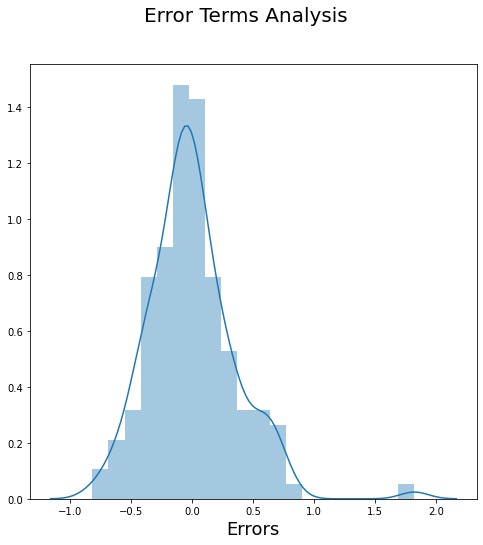

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price2), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

** Step 8: Making Predictions Using the Final Model** 

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the model.

In [ ]:
x_test_2 = x_test_1[x_train_rfe9c.columns]

In [ ]:
# Making predictions using the final model
y_pred2 = lm_rfe9.predict(x_test_2)

**Step 9: Model Evaluation**

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred2')

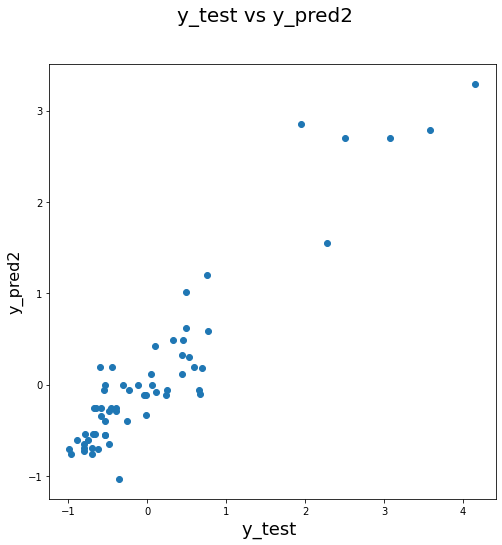

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred2)
fig.suptitle('y_test vs y_pred2', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred2', fontsize=16)

**RMSE Score**

In [ ]:
r2_score(y_test, y_pred2)

0.8771625590707148

The R2 score of Training set is 0.872 and Test set is 0.877 which is quite close. Hence, We can say that our model is good enough to predict the Car prices using below predictor variables.

* Cars_Category_TopNotch_Cars	
* carwidth	
* carbody_sedan	
* enginelocation_rear	
* carbody_hatchback	
* carbody_wagon


**Model II Conclusions:**

* R-squared and Adjusted R-squared - 0.872 and 0.877 - 90% variance explained.
* F-stats and Prob(F-stats) (overall model fit) - 154.4 and 3.57e-58(approx. 0.0) - Model fit is significant and explained 90%
variance is just not by chance.
* p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the
predictors are statistically significant.

**Closing Statement:**

Both the models are good enough to predict the carprices which explains the variance of data upto 90% and the model is significant.